# Clasificación con Regresión Logística - EMNIST

Este notebook implementa un clasificador de **Regresión Logística Multinomial** para el dataset EMNIST con 62 clases (0-9, A-Z, a-z).

**Objetivo**: Entrenar y evaluar un modelo de regresión logística usando datos preprocesados con PCA.

## 1. Importación de Librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import pickle
from pathlib import Path
import time

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('✓ Librerías importadas correctamente')

ModuleNotFoundError: No module named 'numpy'

## 2. Carga de Datos

Cargamos los datos preprocesados que ya tienen PCA aplicado (61 componentes).

In [ ]:
# Cargar datos de entrenamiento (con PCA)
print('Cargando datos de entrenamiento...')
train_data = np.load('../../preprocesamiento/output/emnist_train_reduced.npz')
X_train = train_data['X_train']
y_train = train_data['y_train']

# Cargar datos de test (con PCA)
print('Cargando datos de test...')
test_data = np.load('../../preprocesamiento/output/emnist_test_reduced.npz')
X_test = test_data['X_test']
y_test = test_data['y_test']

# Cargar mapeo de clases
print('Cargando mapeo de clases...')
with open('../../preprocesamiento/class_mapping.pkl', 'rb') as f:
    class_mapping = pickle.load(f)

print(f'\n{"="*60}')
print('INFORMACIÓN DEL DATASET')
print(f'{"="*60}')
print(f'Train: {X_train.shape[0]:,} muestras × {X_train.shape[1]} features')
print(f'Test:  {X_test.shape[0]:,} muestras × {X_test.shape[1]} features')
print(f'Clases: {len(np.unique(y_train))} (dígitos + letras mayúsculas + minúsculas)')
print(f'{"="*60}')

Cargando datos de entrenamiento...
Cargando datos de test...
Cargando mapeo de clases...

INFORMACIÓN DEL DATASET
Train: 697,932 muestras × 61 features
Test:  116,323 muestras × 61 features
Clases: 62 (dígitos + letras mayúsculas + minúsculas)


## 3. Entrenamiento del Modelo

### Regresión Logística Multinomial

**Justificación del modelo**:
- **Eficiente**: Rápido para datasets grandes (697K muestras)
- **Multiclase nativo**: Maneja 62 clases con `multi_class='multinomial'`
- **Solver 'lbfgs'**: Optimizado para problemas multiclase
- **Regularización L2**: Previene overfitting (parámetro `C`)
- **Interpretable**: Coeficientes lineales por clase

**Parámetros seleccionados**:
- `max_iter=1000`: Suficientes iteraciones para convergencia
- `C=1.0`: Regularización L2 estándar (inverso de la fuerza de regularización)
- `solver='lbfgs'`: Optimizador eficiente para multiclase
- `multi_class='multinomial'`: Modelo multinomial (softmax)
- `n_jobs=-1`: Paralelización usando todos los cores

In [18]:
# Crear modelo de regresión logística
print(f'\n{"="*60}')
print('ENTRENAMIENTO DEL MODELO')
print(f'{"="*60}')

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial',
    C=1.0,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Entrenar modelo
print('\nIniciando entrenamiento...\n')
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f'\n{"="*60}')
print('✓ ENTRENAMIENTO COMPLETADO')
print(f'{"="*60}')
print(f'Tiempo de entrenamiento: {training_time:.2f} segundos ({training_time/60:.2f} minutos)')
print(f'Número de clases: {len(model.classes_)}')
print(f'Número de features: {model.coef_.shape[1]}')
print(f'Forma de coeficientes: {model.coef_.shape} (clases × features)')
print(f'{"="*60}')


ENTRENAMIENTO DEL MODELO

Iniciando entrenamiento...



c:\Users\laura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



✓ ENTRENAMIENTO COMPLETADO
Tiempo de entrenamiento: 328.59 segundos (5.48 minutos)
Número de clases: 62
Número de features: 61
Forma de coeficientes: (62, 61) (clases × features)


## 4. Evaluación del Modelo

### 4.1 Métricas Globales

In [19]:
# Predicciones
print('Generando predicciones...\n')
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas para train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Calcular métricas para test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Mostrar resultados
print(f'{"="*60}')
print('MÉTRICAS DE EVALUACIÓN')
print(f'{"="*60}')
print(f'\n{"CONJUNTO DE ENTRENAMIENTO":^60}')
print(f'{"":-^60}')
print(f'Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)')
print(f'Precision: {train_precision:.4f}')
print(f'Recall:    {train_recall:.4f}')
print(f'F1-Score:  {train_f1:.4f}')

print(f'\n{"CONJUNTO DE TEST":^60}')
print(f'{"":-^60}')
print(f'Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'Precision: {test_precision:.4f}')
print(f'Recall:    {test_recall:.4f}')
print(f'F1-Score:  {test_f1:.4f}')

# Análisis de generalización
diff_accuracy = abs(train_accuracy - test_accuracy)
print(f'\n{"ANÁLISIS DE GENERALIZACIÓN":^60}')
print(f'{"":-^60}')
print(f'Diferencia de accuracy: {diff_accuracy:.4f} ({diff_accuracy*100:.2f}%)')

if diff_accuracy < 0.02:
    print('✓ Excelente generalización')
elif diff_accuracy < 0.05:
    print('✓ Buena generalización')
else:
    print('⚠ Posible overfitting')

print(f'{"="*60}')

Generando predicciones...

MÉTRICAS DE EVALUACIÓN

                 CONJUNTO DE ENTRENAMIENTO                  
------------------------------------------------------------
Accuracy:  0.8127 (81.27%)
Precision: 0.7974
Recall:    0.8127
F1-Score:  0.7958

                      CONJUNTO DE TEST                      
------------------------------------------------------------
Accuracy:  0.8105 (81.05%)
Precision: 0.7923
Recall:    0.8105
F1-Score:  0.7937

                 ANÁLISIS DE GENERALIZACIÓN                 
------------------------------------------------------------
Diferencia de accuracy: 0.0022 (0.22%)
✓ Excelente generalización


### 4.2 Reporte de Clasificación por Clase

In [20]:
# Generar reporte de clasificación
target_names = [class_mapping[i] for i in sorted(class_mapping.keys())]

print(f'{"="*80}')
print('REPORTE DE CLASIFICACIÓN DETALLADO (Test Set)')
print(f'{"="*80}\n')

report = classification_report(y_test, y_test_pred, target_names=target_names, zero_division=0)
print(report)

# Convertir a DataFrame para análisis
report_dict = classification_report(
    y_test, y_test_pred, 
    target_names=target_names, 
    output_dict=True,
    zero_division=0
)
report_df = pd.DataFrame(report_dict).transpose()

# Clases con mejor rendimiento
print(f'\n{"="*80}')
print('TOP 10 CLASES CON MEJOR F1-SCORE')
print(f'{"="*80}')
best_classes = report_df.iloc[:-3].sort_values('f1-score', ascending=False).head(10)
print(best_classes[['precision', 'recall', 'f1-score', 'support']].to_string())

# Clases con peor rendimiento
print(f'\n{"="*80}')
print('TOP 10 CLASES CON PEOR F1-SCORE')
print(f'{"="*80}')
worst_classes = report_df.iloc[:-3].sort_values('f1-score', ascending=True).head(10)
print(worst_classes[['precision', 'recall', 'f1-score', 'support']].to_string())

REPORTE DE CLASIFICACIÓN DETALLADO (Test Set)

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      5778
           1       0.66      0.90      0.76      6330
           2       0.89      0.93      0.91      5869
           3       0.96      0.96      0.96      5969
           4       0.89      0.92      0.90      5619
           5       0.86      0.88      0.87      5190
           6       0.93      0.95      0.94      5705
           7       0.95      0.96      0.96      6139
           8       0.92      0.94      0.93      5633
           9       0.89      0.96      0.92      5686
           A       0.84      0.86      0.85      1062
           B       0.78      0.78      0.78       648
           C       0.72      0.86      0.78      1739
           D       0.82      0.79      0.80       779
           E       0.90      0.85      0.87       851
           F       0.72      0.83      0.77      1440
           G       0.85      0.76 

### 4.3 Matriz de Confusión

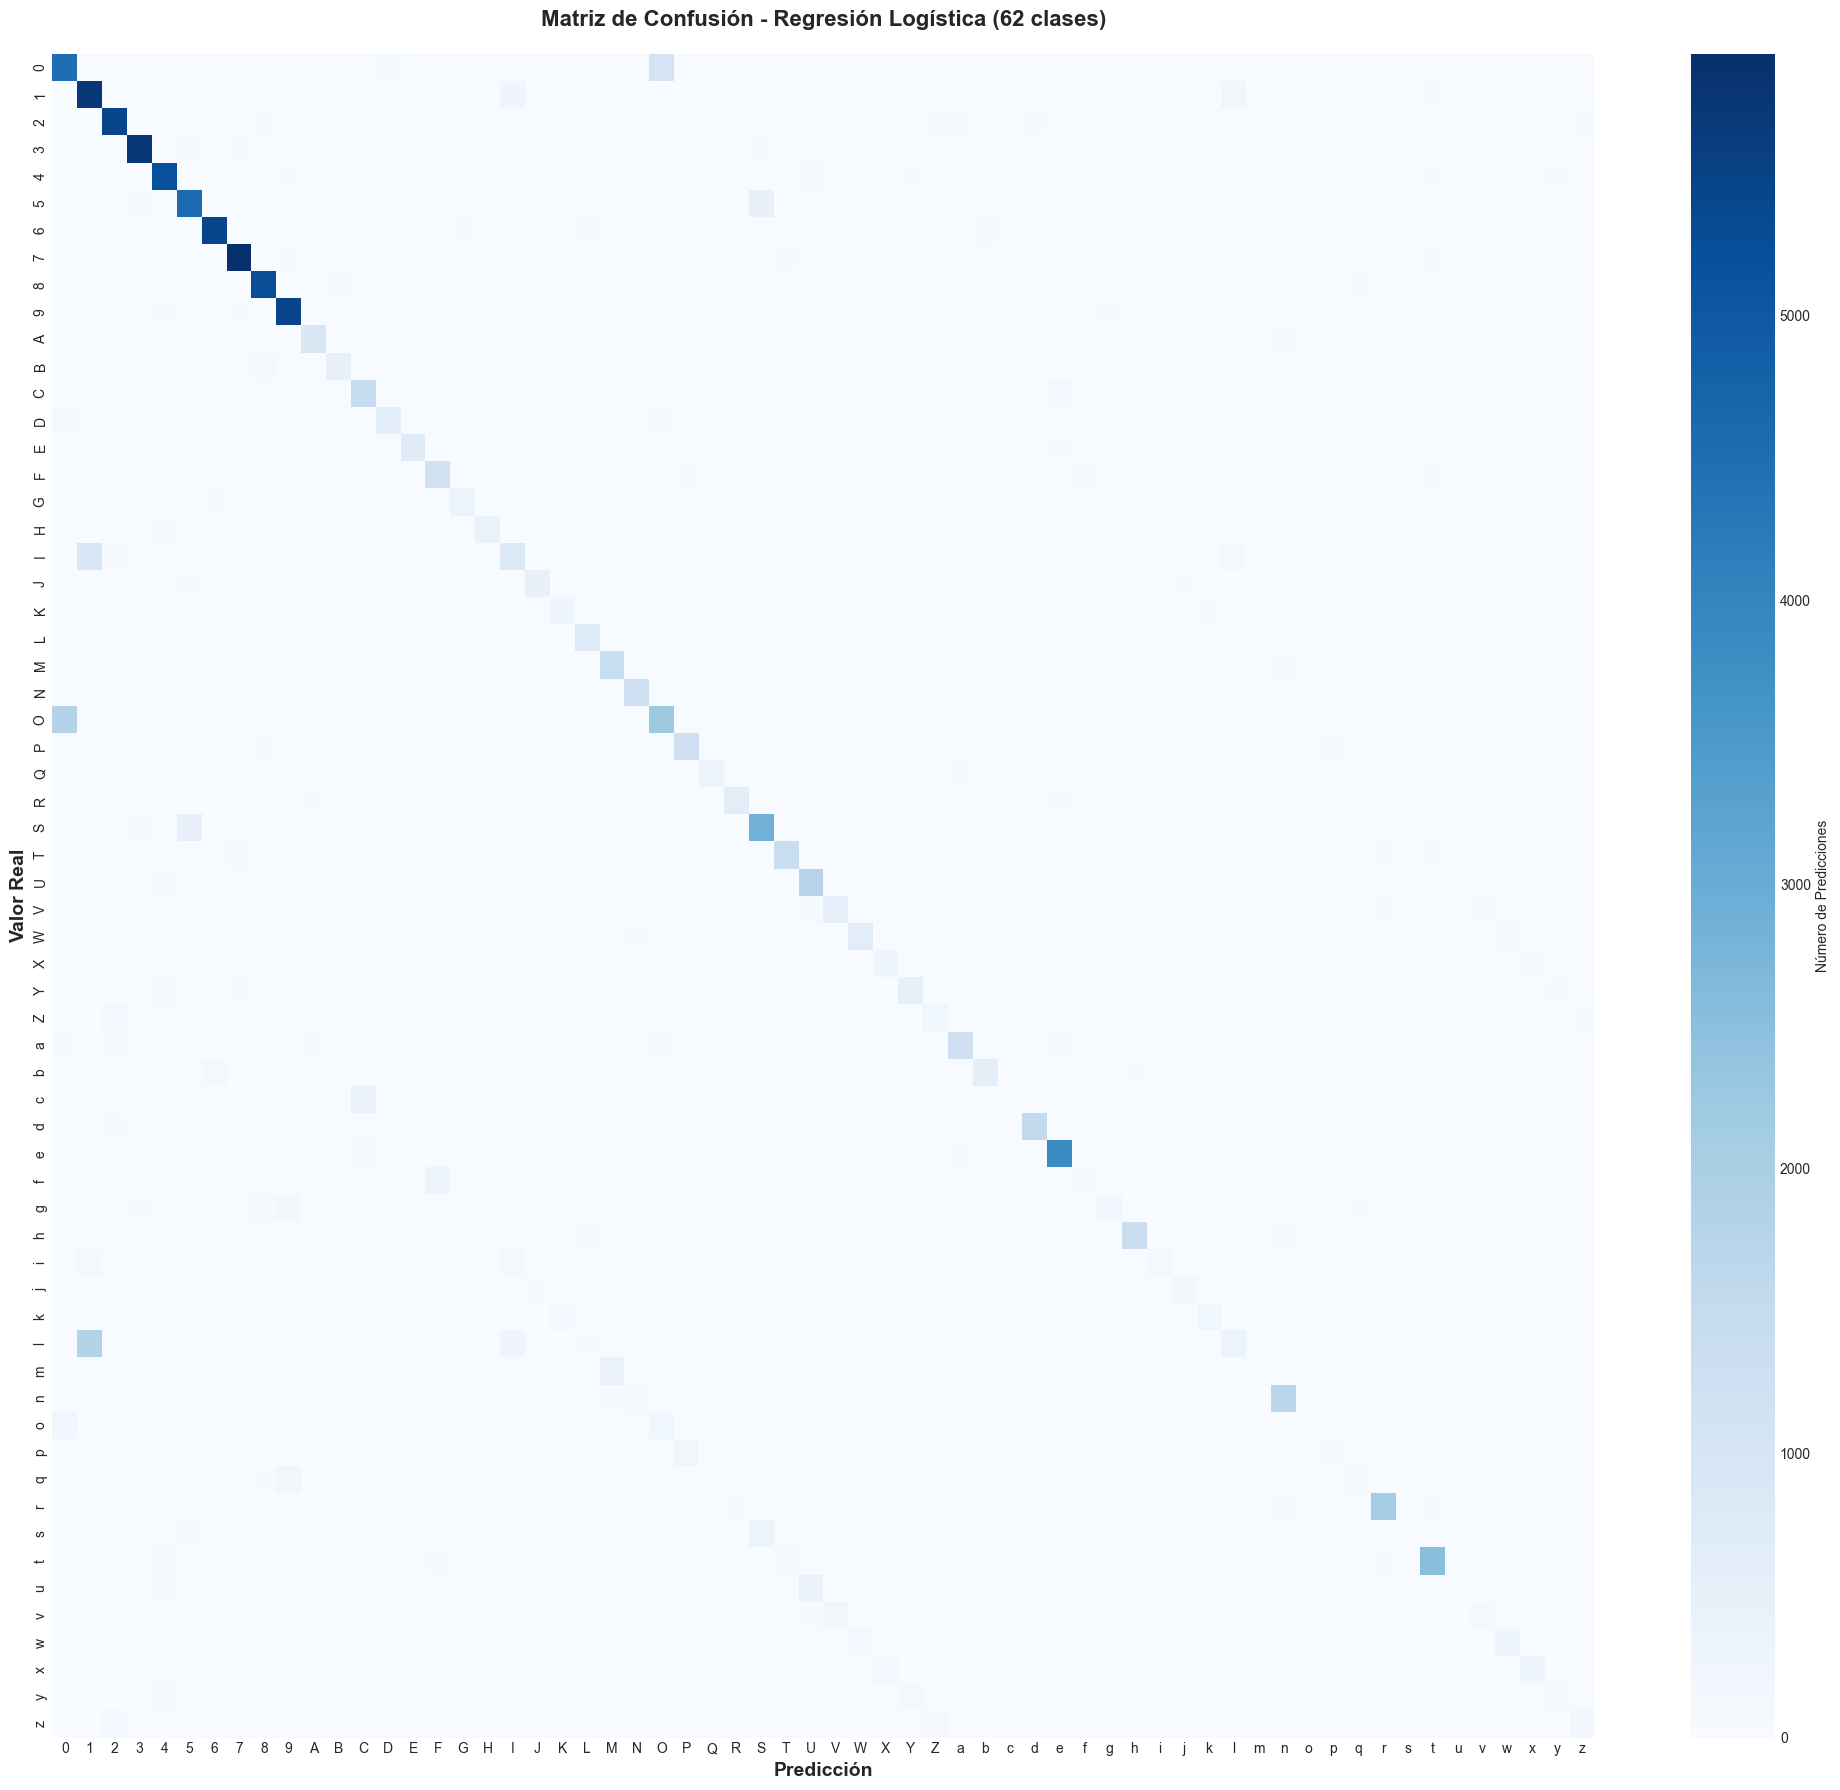

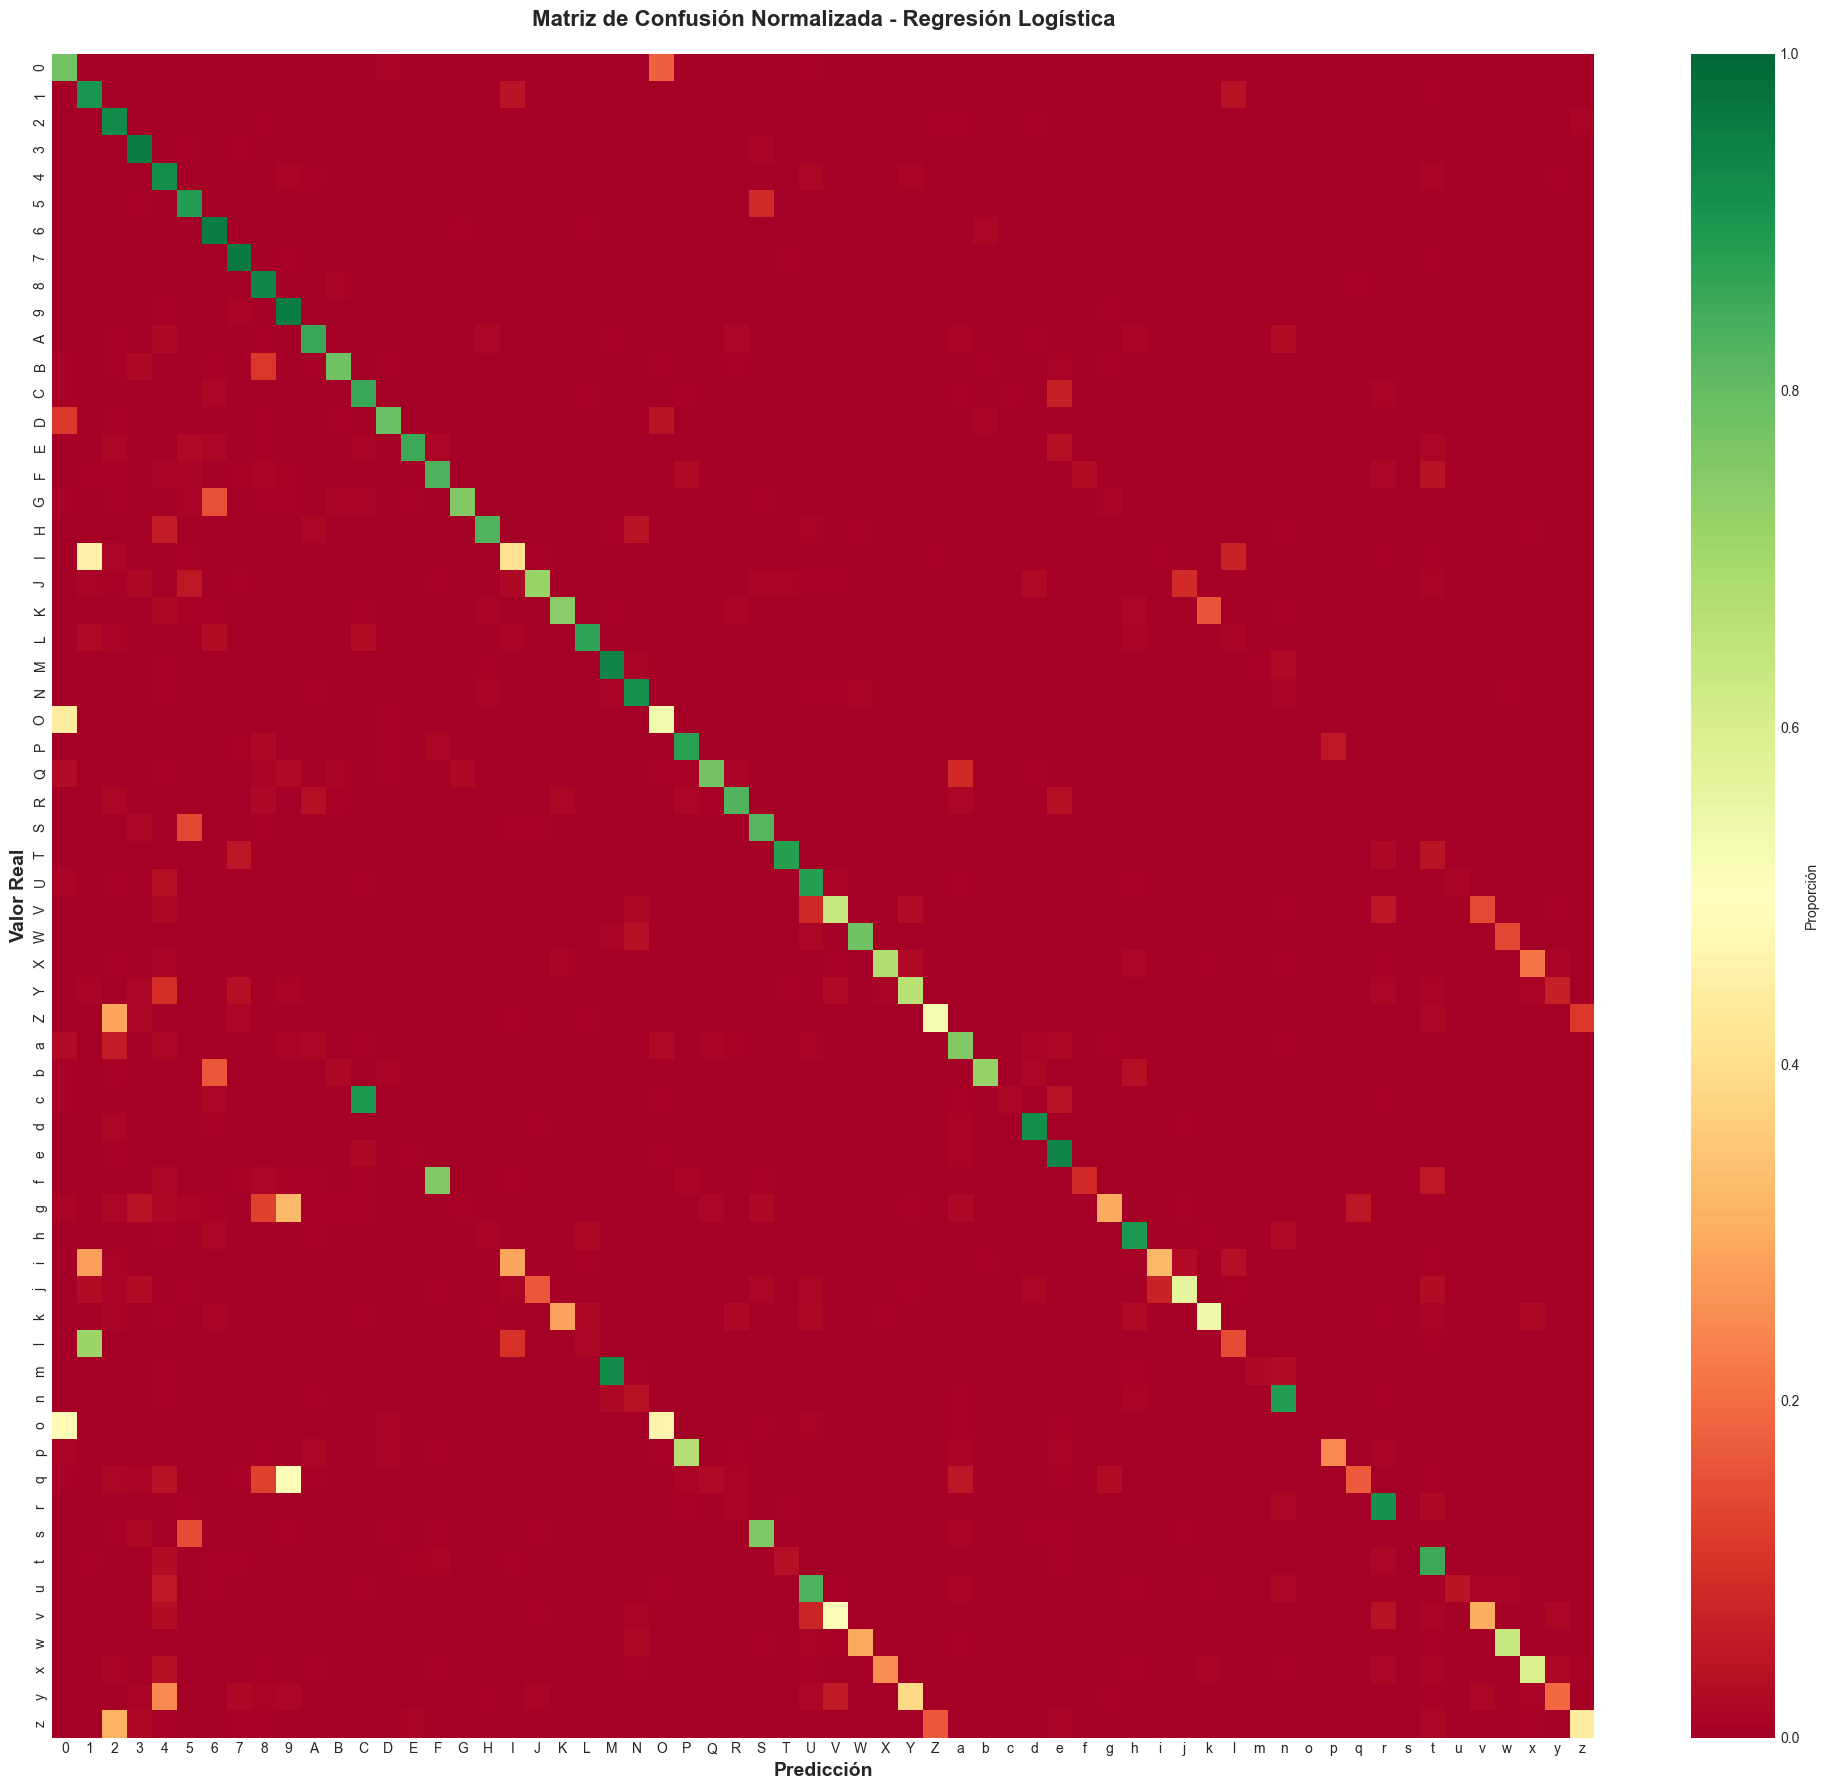

In [21]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Visualizar matriz de confusión completa
plt.figure(figsize=(20, 18))
sns.heatmap(
    cm, 
    annot=False, 
    fmt='d', 
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar_kws={'label': 'Número de Predicciones'}
)
plt.xlabel('Predicción', fontsize=14, weight='bold')
plt.ylabel('Valor Real', fontsize=14, weight='bold')
plt.title('Matriz de Confusión - Regresión Logística (62 clases)', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

# Matriz de confusión normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 18))
sns.heatmap(
    cm_normalized,
    annot=False,
    fmt='.2f',
    cmap='RdYlGn',
    xticklabels=target_names,
    yticklabels=target_names,
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'Proporción'}
)
plt.xlabel('Predicción', fontsize=14, weight='bold')
plt.ylabel('Valor Real', fontsize=14, weight='bold')
plt.title('Matriz de Confusión Normalizada - Regresión Logística', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

### 4.4 Análisis de Errores

TOP 20 CONFUSIONES MÁS FRECUENTES

Real Predicho  Cantidad Proporción
   O        0      1819     43.77%
   l        1      1818     71.72%
   0        O      1057     18.29%
   I        1       929     45.36%
   S        5       489     13.94%
   5        S       462      8.90%
   m        M       430     92.67%
   u        U       400     82.99%
   c        C       387     89.58%
   s        S       334     76.43%
   f        F       303     75.75%
   1        I       268      4.23%
   l        I       266     10.49%
   q        9       248     49.11%
   1        l       247      3.90%
   p        P       246     66.85%
   v        V       240     51.28%
   o        0       225     48.28%
   o        O       215     46.14%
   g        9       190     32.26%


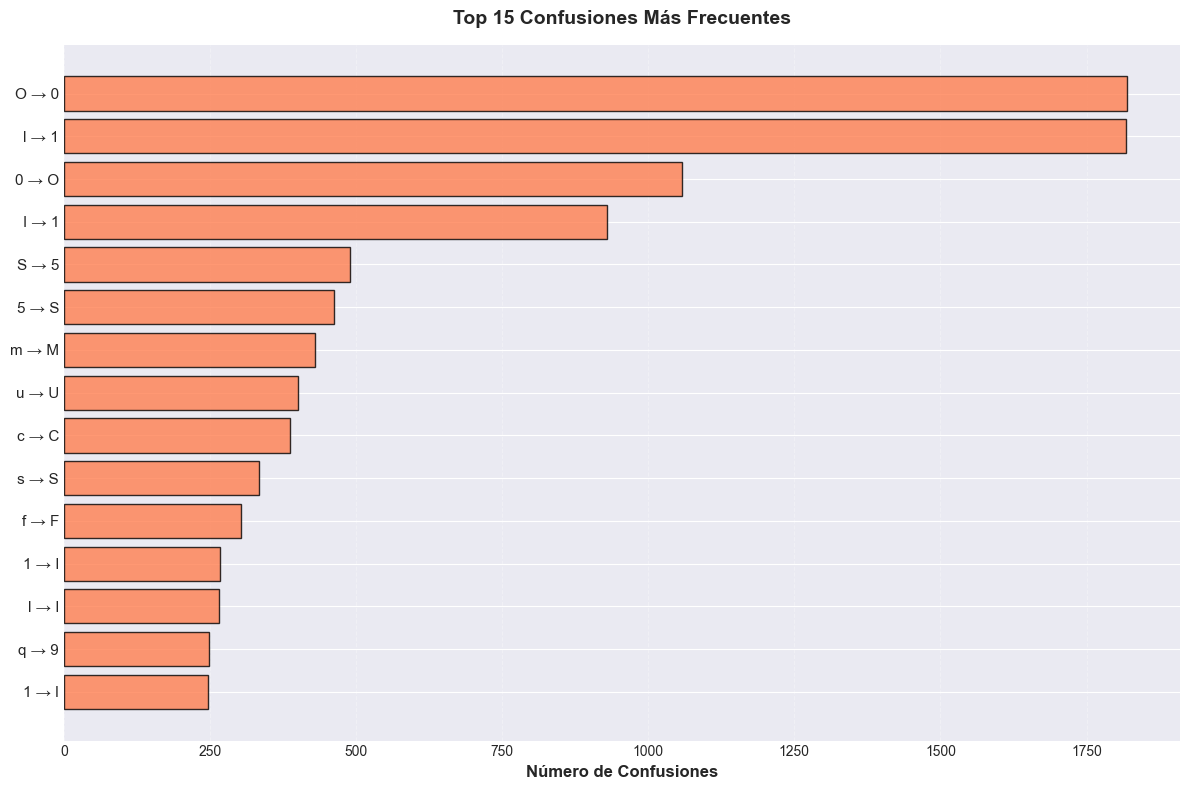


PATRONES COMUNES DE ERROR
Confusiones típicas en clasificación de caracteres:
  • O (letra) ↔ 0 (cero): Similitud visual
  • I (mayúscula) ↔ l (L minúscula) ↔ 1 (uno): Formas lineales
  • S ↔ 5: Curvatura similar
  • Z ↔ 2: Formas angulares similares
  • Mayúsculas ↔ Minúsculas: C/c, O/o, S/s, etc.


In [22]:
# Encontrar confusiones más frecuentes
confusion_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append({
                'Real': target_names[i],
                'Predicho': target_names[j],
                'Cantidad': cm[i, j],
                'Proporción': f"{cm_normalized[i, j]:.2%}"
            })

confusion_df = pd.DataFrame(confusion_pairs).sort_values('Cantidad', ascending=False)

print(f'{"="*80}')
print('TOP 20 CONFUSIONES MÁS FRECUENTES')
print(f'{"="*80}\n')
print(confusion_df.head(20).to_string(index=False))

# Visualizar top confusiones
plt.figure(figsize=(12, 8))
top_confusions = confusion_df.head(15)
labels = [f"{row['Real']} → {row['Predicho']}" for _, row in top_confusions.iterrows()]
values = top_confusions['Cantidad'].values

plt.barh(range(len(labels)), values, color='coral', alpha=0.8, edgecolor='black')
plt.yticks(range(len(labels)), labels, fontsize=11)
plt.xlabel('Número de Confusiones', fontsize=12, weight='bold')
plt.title('Top 15 Confusiones Más Frecuentes', fontsize=14, weight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Análisis de patrones
print(f'\n{"="*80}')
print('PATRONES COMUNES DE ERROR')
print(f'{"="*80}')
print('Confusiones típicas en clasificación de caracteres:')
print('  • O (letra) ↔ 0 (cero): Similitud visual')
print('  • I (mayúscula) ↔ l (L minúscula) ↔ 1 (uno): Formas lineales')
print('  • S ↔ 5: Curvatura similar')
print('  • Z ↔ 2: Formas angulares similares')
print('  • Mayúsculas ↔ Minúsculas: C/c, O/o, S/s, etc.')
print(f'{"="*80}')

### 4.5 Distribución de Confianza

C:\Users\laura\AppData\Local\Temp\ipykernel_15288\2235505120.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(


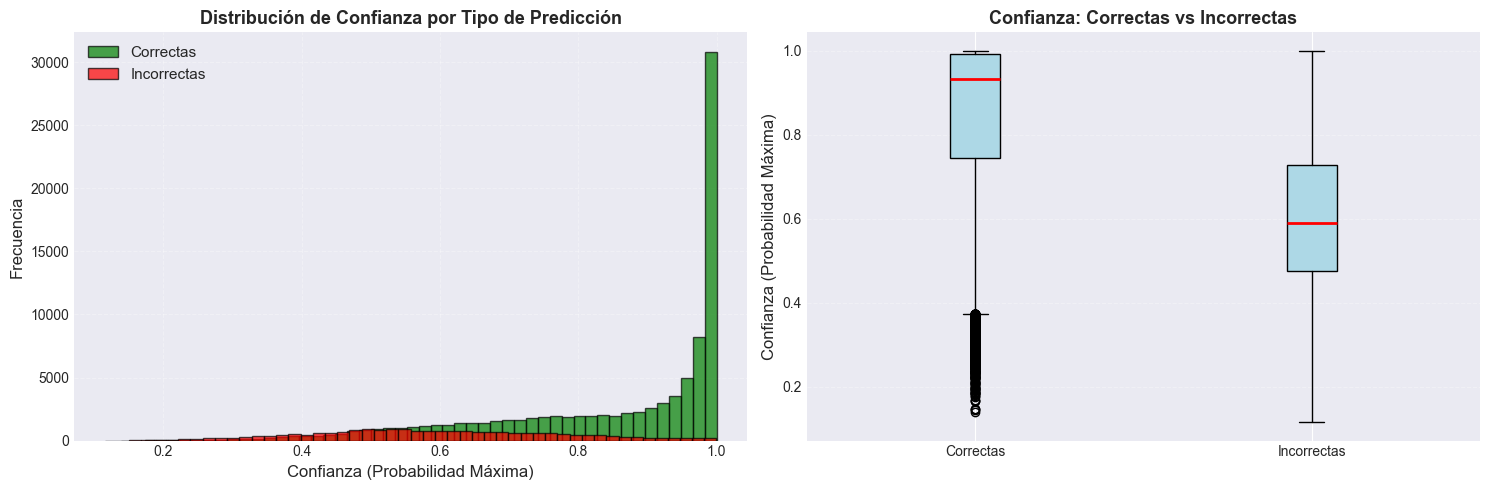

ESTADÍSTICAS DE CONFIANZA

Predicciones Correctas:
  Media:    0.8518
  Mediana:  0.9332
  Std:      0.1715
  Min:      0.1386
  Max:      1.0000

Predicciones Incorrectas:
  Media:    0.6000
  Mediana:  0.5897
  Std:      0.1762
  Min:      0.1156
  Max:      0.9998


In [23]:
# Obtener probabilidades de predicción
y_test_proba = model.predict_proba(X_test)
max_probas = np.max(y_test_proba, axis=1)

# Separar por predicciones correctas e incorrectas
correct_mask = y_test == y_test_pred
correct_probas = max_probas[correct_mask]
incorrect_probas = max_probas[~correct_mask]

# Visualizar distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histograma general
ax1.hist(correct_probas, bins=50, alpha=0.7, label='Correctas', color='green', edgecolor='black')
ax1.hist(incorrect_probas, bins=50, alpha=0.7, label='Incorrectas', color='red', edgecolor='black')
ax1.set_xlabel('Confianza (Probabilidad Máxima)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_title('Distribución de Confianza por Tipo de Predicción', fontsize=13, weight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3, linestyle='--')

# Box plot comparativo
ax2.boxplot(
    [correct_probas, incorrect_probas],
    labels=['Correctas', 'Incorrectas'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', edgecolor='black'),
    medianprops=dict(color='red', linewidth=2)
)
ax2.set_ylabel('Confianza (Probabilidad Máxima)', fontsize=12)
ax2.set_title('Confianza: Correctas vs Incorrectas', fontsize=13, weight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Estadísticas
print(f'{"="*60}')
print('ESTADÍSTICAS DE CONFIANZA')
print(f'{"="*60}')
print(f'\nPredicciones Correctas:')
print(f'  Media:    {correct_probas.mean():.4f}')
print(f'  Mediana:  {np.median(correct_probas):.4f}')
print(f'  Std:      {correct_probas.std():.4f}')
print(f'  Min:      {correct_probas.min():.4f}')
print(f'  Max:      {correct_probas.max():.4f}')

print(f'\nPredicciones Incorrectas:')
print(f'  Media:    {incorrect_probas.mean():.4f}')
print(f'  Mediana:  {np.median(incorrect_probas):.4f}')
print(f'  Std:      {incorrect_probas.std():.4f}')
print(f'  Min:      {incorrect_probas.min():.4f}')
print(f'  Max:      {incorrect_probas.max():.4f}')
print(f'{"="*60}')

## 5. Guardar Modelo y Componentes

In [24]:
# Crear directorio de salida
output_dir = Path('output')
output_dir.mkdir(exist_ok=True)

print(f'{"="*60}')
print('GUARDANDO MODELO Y COMPONENTES')
print(f'{"="*60}\n')

# Guardar modelo
model_path = output_dir / 'logistic_regression_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f'✓ Modelo guardado: {model_path}')

# Guardar mapeo de clases
mapping_path = output_dir / 'class_mapping.pkl'
with open(mapping_path, 'wb') as f:
    pickle.dump(class_mapping, f)
print(f'✓ Mapeo guardado: {mapping_path}')

# Guardar métricas
metrics = {
    'train_accuracy': float(train_accuracy),
    'train_precision': float(train_precision),
    'train_recall': float(train_recall),
    'train_f1': float(train_f1),
    'test_accuracy': float(test_accuracy),
    'test_precision': float(test_precision),
    'test_recall': float(test_recall),
    'test_f1': float(test_f1),
    'training_time': float(training_time),
    'n_components': 61,
    'n_classes': int(len(model.classes_)),
    'n_samples_train': int(len(y_train)),
    'n_samples_test': int(len(y_test))
}

metrics_path = output_dir / 'metrics.pkl'
with open(metrics_path, 'wb') as f:
    pickle.dump(metrics, f)
print(f'✓ Métricas guardadas: {metrics_path}')

print(f'\n{"="*60}')
print('✓ TODOS LOS ARCHIVOS GUARDADOS EXITOSAMENTE')
print(f'{"="*60}')
print('\nArchivos generados:')
print('  1. logistic_regression_model.pkl - Modelo entrenado')
print('  2. class_mapping.pkl - Mapeo de clases')
print('  3. metrics.pkl - Métricas de evaluación')
print('\n✓ Listos para usar en la interfaz gráfica')
print(f'{"="*60}')

GUARDANDO MODELO Y COMPONENTES

✓ Modelo guardado: output\logistic_regression_model.pkl
✓ Mapeo guardado: output\class_mapping.pkl
✓ Métricas guardadas: output\metrics.pkl

✓ TODOS LOS ARCHIVOS GUARDADOS EXITOSAMENTE

Archivos generados:
  1. logistic_regression_model.pkl - Modelo entrenado
  2. class_mapping.pkl - Mapeo de clases
  3. metrics.pkl - Métricas de evaluación

✓ Listos para usar en la interfaz gráfica


## 6. Resumen Final

In [25]:
print(f'{"="*80}')
print('RESUMEN FINAL - REGRESIÓN LOGÍSTICA MULTINOMIAL')
print(f'{"="*80}')

print(f'\n{"CONFIGURACIÓN DEL MODELO":^80}')
print(f'{"-"*80}')
print(f'  Algoritmo:        Regresión Logística Multinomial')
print(f'  Solver:           lbfgs')
print(f'  Regularización:   L2 (C=1.0)')
print(f'  Clases:           {len(model.classes_)} (0-9, A-Z, a-z)')
print(f'  Features (PCA):   {model.coef_.shape[1]}')

print(f'\n{"DATASET":^80}')
print(f'{"-"*80}')
print(f'  Train:            {len(y_train):,} muestras')
print(f'  Test:             {len(y_test):,} muestras')

print(f'\n{"RENDIMIENTO (TEST SET)":^80}')
print(f'{"-"*80}')
print(f'  Accuracy:         {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'  Precision:        {test_precision:.4f}')
print(f'  Recall:           {test_recall:.4f}')
print(f'  F1-Score:         {test_f1:.4f}')
print(f'  Tiempo:           {training_time:.2f}s ({training_time/60:.2f} min)')

print(f'\n{"JUSTIFICACIÓN":^80}')
print(f'{"-"*80}')
print('  ✓ Eficiente para datasets grandes (697K muestras)')
print('  ✓ Entrenamiento y predicción rápidos')
print('  ✓ Ideal para interfaz en tiempo real')
print('  ✓ Modelo interpretable (coeficientes lineales)')
print('  ✓ Regularización L2 previene overfitting')

print(f'\n{"="*80}')
print('✓ MODELO LISTO PARA PRODUCCIÓN')
print(f'{"="*80}')
print('\nPróximos pasos:')
print('  → Ejecutar: python graphic-interface/character_recognizer_gui.py')
print('  → Dibujar caracteres y ver predicciones en tiempo real')
print(f'\n{"="*80}')

RESUMEN FINAL - REGRESIÓN LOGÍSTICA MULTINOMIAL

                            CONFIGURACIÓN DEL MODELO                            
--------------------------------------------------------------------------------
  Algoritmo:        Regresión Logística Multinomial
  Solver:           lbfgs
  Regularización:   L2 (C=1.0)
  Clases:           62 (0-9, A-Z, a-z)
  Features (PCA):   61

                                    DATASET                                     
--------------------------------------------------------------------------------
  Train:            697,932 muestras
  Test:             116,323 muestras

                             RENDIMIENTO (TEST SET)                             
--------------------------------------------------------------------------------
  Accuracy:         0.8105 (81.05%)
  Precision:        0.7923
  Recall:           0.8105
  F1-Score:         0.7937
  Tiempo:           328.59s (5.48 min)

                                 JUSTIFICACIÓN               